# Random Selection

### Importing the libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Importing the dataset

In [21]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
5        1     1     0     0     0     0     0     0     0      0
6        0     0     0     1     0     0     0     0     0      0
7        1     1     0     0     1     0     0     0     0      0
8        0     0     0     0     0     0     0     0     0      0
9        0     0     1     0     0     0     0     0     0      0
10       0     0     0     0     0     0     0     0     0      0
11       0     0     0     0     0     0     0     0     0      0
12       0     0     0     1     0     0     0     0     0      0
13       0     0     0     0     0     0     0     0     1      0
14       0

### Implementing Random Selection

In [22]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0,N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [23]:
print(total_reward)

1233


### Visualising the result - Histogram

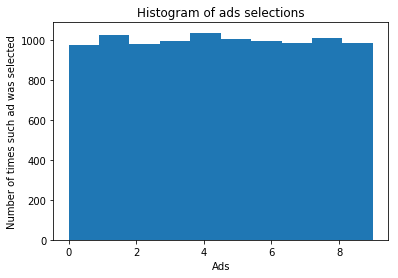

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times such ad was selected')
plt.show()

# Upper Confidence Bound

### Implementing UCB

In [24]:
ads_select = []
numbers_of_selections =  [0] * d
sums_of_rewards = [0] * d
total_rewards = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_select.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    rewards = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + rewards
    total_rewards = total_rewards + rewards

In [25]:
print(total_rewards)

2178


### visualising the results

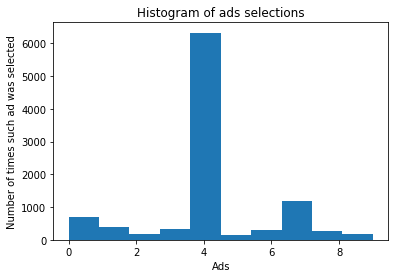

In [26]:
plt.hist(ads_select)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times such ad was selected')
plt.show()